<a href="https://colab.research.google.com/github/AlexFerreira10/visualizacao-dados-uerj/blob/main/Revis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

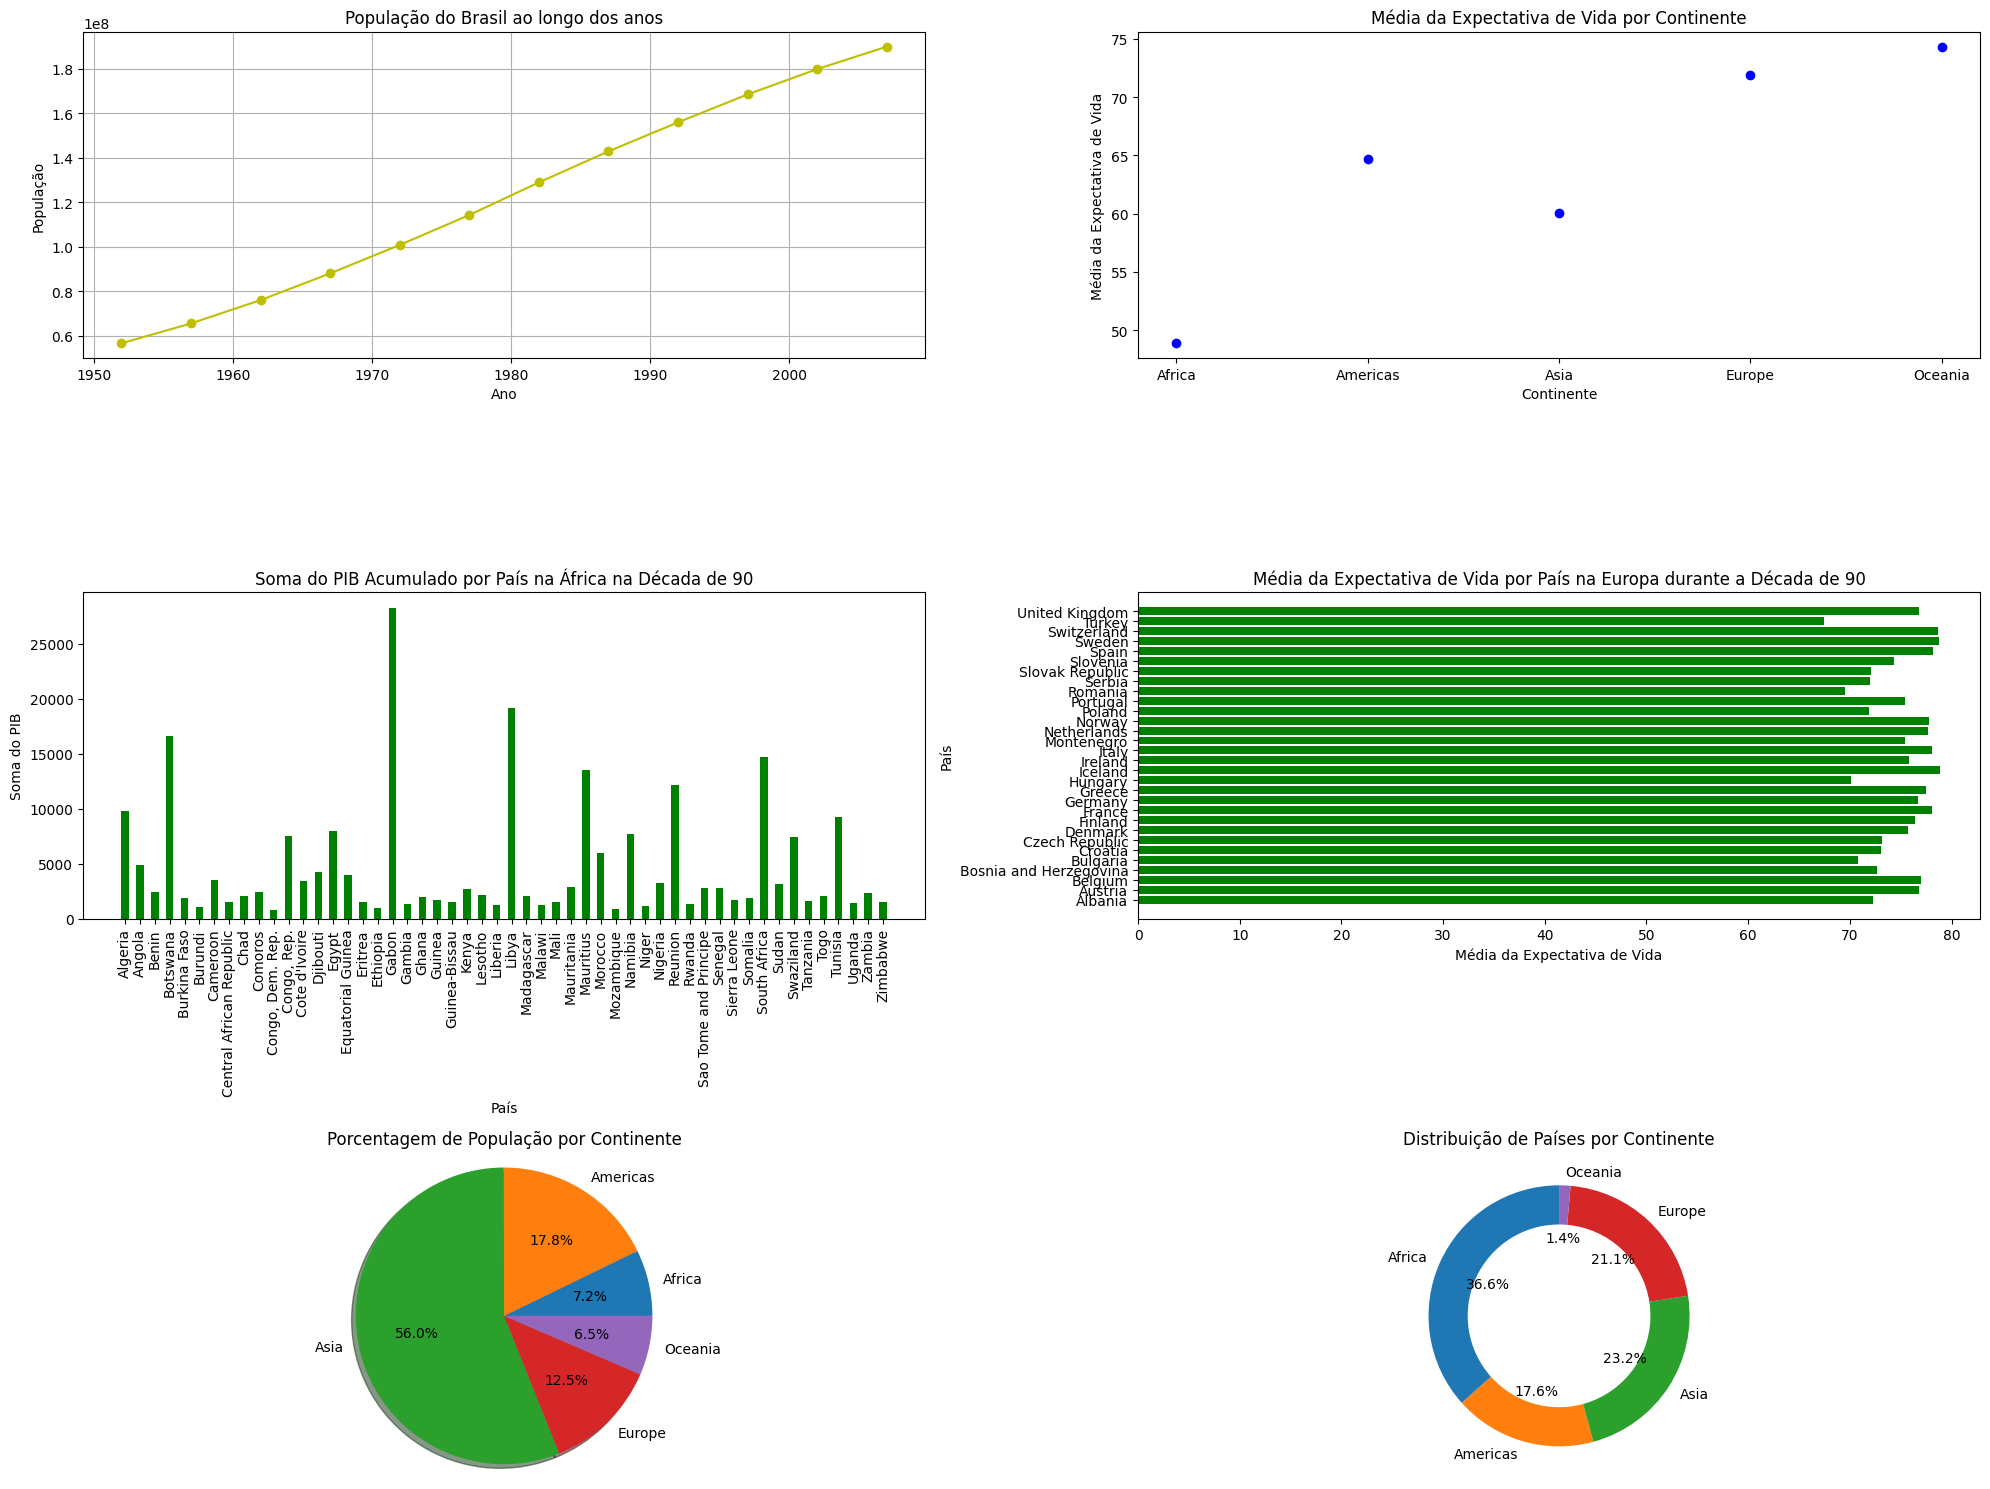

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo carregado
file_path = '/content/sample_data/gapminder.csv'

# Leitura do arquivo CSV
data = pd.read_csv(file_path)

# Configurando a figura com múltiplos subplots
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Gráfico 1: Linha
brazil_data = data[data['country'] == 'Brazil']
axs[0, 0].plot(brazil_data['year'], brazil_data['pop'], color='y', marker='o')
axs[0, 0].set_title('População do Brasil ao longo dos anos')
axs[0, 0].set_xlabel('Ano')
axs[0, 0].set_ylabel('População')
axs[0, 0].grid(True)

# Gráfico 2: Ponto
continent_data = data.groupby('continent')['lifeExp'].mean()
axs[0, 1].scatter(continent_data.index, continent_data.values, color='blue')
axs[0, 1].set_title('Média da Expectativa de Vida por Continente')
axs[0, 1].set_xlabel('Continente')
axs[0, 1].set_ylabel('Média da Expectativa de Vida')

# Gráfico 3: Barra Vertical
africa_data_90 = data[(data['continent'] == 'Africa') & (data['year'] >= 1990) & (data['year'] <= 1999)]
country_data_africa = africa_data_90.groupby('country')['gdpPercap'].sum()
axs[1, 0].bar(country_data_africa.index, country_data_africa.values, color='g', width=0.5)
axs[1, 0].set_title('Soma do PIB Acumulado por País na África na Década de 90')
axs[1, 0].set_xlabel('País')
axs[1, 0].set_ylabel('Soma do PIB')
axs[1, 0].tick_params(axis='x', rotation=90)

# Gráfico 4: Barra Horizontal
europe_data_90 = data[(data['continent'] == 'Europe') & (data['year'] >= 1990) & (data['year'] <= 1999)]
country_data_europe = europe_data_90.groupby('country')['lifeExp'].mean()
axs[1, 1].barh(country_data_europe.index, country_data_europe.values, color='g')
axs[1, 1].set_title('Média da Expectativa de Vida por País na Europa durante a Década de 90')
axs[1, 1].set_xlabel('Média da Expectativa de Vida')
axs[1, 1].set_ylabel('País')

# Gráfico 5: Pizza
continent_data_pop_mean = data.groupby('continent')['pop'].mean()
axs[2, 0].pie(continent_data_pop_mean, labels=continent_data_pop_mean.index, autopct='%1.1f%%', shadow=True)
axs[2, 0].set_title('Porcentagem de População por Continente')
axs[2, 0].axis('equal')

# Gráfico 6: Rosca
continent_data_country_count = data.groupby('continent')['country'].count()
axs[2, 1].pie(continent_data_country_count, labels=continent_data_country_count.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
axs[2, 1].set_title('Distribuição de Países por Continente')

# Ajustar layout
plt.tight_layout()
plt.show()
